In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/insurance/insurance.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

In [2]:
import sklearn
from sklearn import *
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PassiveAggressiveRegressor, SGDRegressor
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from xgboost import XGBRFRegressor, XGBRegressor

In [3]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [4]:
X_train.head()

,id,age,sex,bmi,children,smoker,region
0,209,40,male,41.230,1,no,northeast
1,540,34,female,38.000,3,no,southwest
2,747,19,male,21.755,0,no,northwest
3,39,60,male,39.900,0,yes,southwest
4,640,33,male,42.400,5,no,southwest


In [5]:
X_test.head()

,id,age,sex,bmi,children,smoker,region
0,1088,52,male,47.740,1,no,southeast
1,1157,23,female,23.180,2,no,northwest
2,1267,24,male,31.065,0,yes,northeast
3,506,22,male,31.350,1,no,northwest
4,659,57,female,28.785,4,no,northeast


In [6]:
X_train.describe()

,id,age,bmi,children
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,663.761682,39.321495,30.755519,1.105607
std,385.000181,13.984804,6.138228,1.216916
min,0.000000,18.000000,15.960000,0.000000
25%,334.250000,27.000000,26.400000,0.000000
50%,656.500000,39.000000,30.500000,1.000000
75%,990.500000,51.000000,34.800000,2.000000
max,1337.000000,64.000000,53.130000,5.000000


In [7]:
X_test.describe()

,id,age,bmi,children
count,268.000000,268.000000,268.000000,268.000000
mean,687.417910,38.750000,30.295597,1.052239
std,392.053478,14.324523,5.932596,1.159989
min,5.000000,18.000000,17.290000,0.000000
25%,335.250000,25.000000,25.830000,0.000000
50%,704.000000,39.000000,30.015000,1.000000
75%,1036.500000,52.000000,34.101250,2.000000
max,1333.000000,64.000000,49.060000,5.000000


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 58.6+ KB


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        268 non-null    int64  
 1   age       268 non-null    int64  
 2   sex       268 non-null    object 
 3   bmi       268 non-null    float64
 4   children  268 non-null    int64  
 5   smoker    268 non-null    object 
 6   region    268 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 14.8+ KB


In [10]:
X_train.drop('id',axis=1, inplace=True)
X_test.drop('id',axis=1, inplace=True)

<AxesSubplot:>

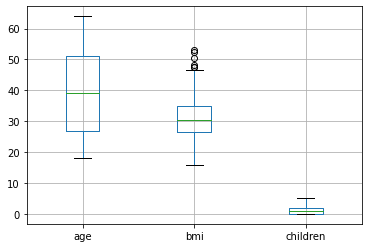

In [11]:
X_train.boxplot()

<AxesSubplot:>

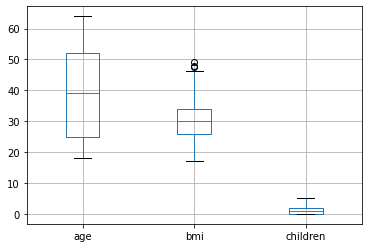

In [12]:
X_test.boxplot()

In [13]:
obj = ['sex', 'smoker','region']
for i in range(3):
    X_train = pd.concat([X_train,pd.get_dummies(X_train[obj[i]]).iloc[:,:-1]],axis=1)
    X_test = pd.concat([X_test,pd.get_dummies(X_test[obj[i]]).iloc[:,:-1]],axis=1)
    
    X_train.drop(obj[i], inplace=True, axis=1)  
    X_test.drop(obj[i], inplace=True, axis=1)    

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
model_list = [AdaBoostRegressor(random_state=0), ExtraTreesRegressor(random_state=0), GradientBoostingRegressor(random_state=0), 
              RandomForestRegressor(random_state=0), LinearRegression(), Ridge(), Lasso(), PassiveAggressiveRegressor(), SGDRegressor(),
              DecisionTreeRegressor(random_state=0), SVR(), XGBRFRegressor(random_state=0), XGBRegressor(random_state=0)]

for i in range(len(model_list)):
    clf = model_list[i]
    clf.fit(X_tra, y_tra.iloc[:,1])
    print(model_list[i],":",mean_squared_error(y_val.iloc[:,1], clf.predict(X_val)))

AdaBoostRegressor(random_state=0) : 29796035.00922906
ExtraTreesRegressor(random_state=0) : 25457364.633580215
GradientBoostingRegressor(random_state=0) : 20770311.91731298
RandomForestRegressor(random_state=0) : 21320357.258106053
LinearRegression() : 35384121.15537763
Ridge() : 35412954.71723129
Lasso() : 35385592.691129066
PassiveAggressiveRegressor() : 39419123.375341676
SGDRegressor() : 35416561.81999461
DecisionTreeRegressor(random_state=0) : 42263895.44934567
SVR() : 204987410.76840988
XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
       

- GradientBoostingRegressor(random_state=0) : 20770311.91731298
- RandomForestRegressor(random_state=0) : 21320357.258106053
- XGBRFRegressor() : 19860470.720311243

In [17]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(ExtraTreesRegressor(random_state=0) , parameters, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

-22167192.954857744
{'max_depth': 5, 'n_estimators': 300}


In [18]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(RandomForestRegressor(random_state=0) , parameters, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

-20916974.24346824
{'max_depth': 5, 'n_estimators': 100}


In [19]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(XGBRFRegressor(random_state=0) , parameters, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

-20993225.482101984
{'max_depth': 5, 'n_estimators': 500}


In [20]:
clf = RandomForestRegressor(random_state=0, max_depth= 5, n_estimators= 500)
clf.fit(X_train, y_train.iloc[:,1])
pred = y_test.copy()
pred.iloc[:,1] = clf.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test.iloc[:,1], pred.iloc[:,1]))

4541.7907680711805

# EDA

In [22]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/insurance/insurance.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='charges')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 7), (268, 7), (1070, 2), (268, 2))

In [23]:
X_train.head()

,id,age,sex,bmi,children,smoker,region
209,209,40,male,41.230,1,no,northeast
540,540,34,female,38.000,3,no,southwest
747,747,19,male,21.755,0,no,northwest
39,39,60,male,39.900,0,yes,southwest
640,640,33,male,42.400,5,no,southwest


In [24]:
y_train.head()

,id,charges
209,209,6610.10970
540,540,6196.44800
747,747,1627.28245
39,39,48173.36100
640,640,6666.24300


<AxesSubplot:>

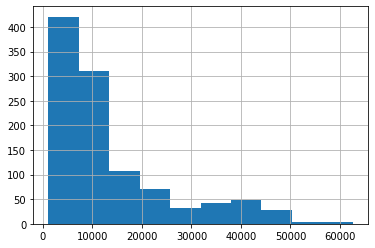

In [25]:
y_train['charges'].hist()

In [26]:
X_train.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [27]:
X_test.isnull().sum()

id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 209 to 1140
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1070 non-null   int64  
 1   age       1070 non-null   int64  
 2   sex       1070 non-null   object 
 3   bmi       1070 non-null   float64
 4   children  1070 non-null   int64  
 5   smoker    1070 non-null   object 
 6   region    1070 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 66.9+ KB


In [29]:
X_train.select_dtypes("object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [30]:
# Train ['sex', 'smoker', 'region']
cols = X_train.select_dtypes("object").columns

for col in cols:
    print("\n=====", col, "=====")
    print("[train]")
    print(X_train[col].value_counts())
    print("[test]")
    print(X_test[col].value_counts())


===== sex =====
[train]
male      551
female    519
Name: sex, dtype: int64
[test]
female    143
male      125
Name: sex, dtype: int64

===== smoker =====
[train]
no     845
yes    225
Name: smoker, dtype: int64
[test]
no     219
yes     49
Name: smoker, dtype: int64

===== region =====
[train]
southeast    304
northeast    266
southwest    261
northwest    239
Name: region, dtype: int64
[test]
northwest    86
southwest    64
southeast    60
northeast    58
Name: region, dtype: int64


# Preprocessing

## Categorical Variables

In [31]:
X_train = pd.get_dummies(X_train, columns = cols)
X_test = pd.get_dummies(X_test, columns = cols)

In [32]:
X_train.head(2)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
209,209,40,41.23,1,0,1,1,0,1,0,0,0
540,540,34,38.00,3,1,0,1,0,0,0,0,1


## Log Transform

<AxesSubplot:>

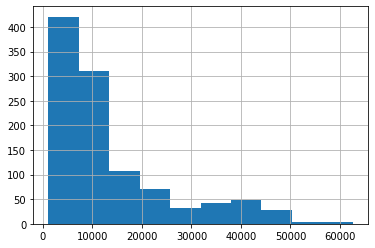

In [33]:
y_train['charges'].hist()

In [34]:
y_train['charges'] = np.log1p(y_train['charges'])

<AxesSubplot:>

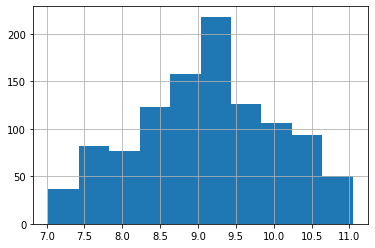

In [35]:
y_train['charges'].hist()

## Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['bmi'] = scaler.fit_transform(X_train[['bmi']])
X_test['bmi'] = scaler.transform(X_test[['bmi']])

## label encoding

In [37]:
# 나이를 10대, 20대, 30대로 구분하기 위해 10을 나눈 몫 값만 구함
X_train['age'] = X_train['age'].apply(lambda x: x//10)
X_test['age'] = X_test['age'].apply(lambda x: x//10)

In [38]:
X_train.head(3)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
209,209,4,1.707232,1,0,1,1,0,1,0,0,0
540,540,3,1.180775,3,1,0,1,0,0,0,0,1
747,747,1,-1.466991,0,0,1,1,0,0,1,0,0


## Train-Validation Split

In [39]:
target = y_train['charges']
X_train = X_train.drop('id', 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [40]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, target, test_size=0.15, random_state=2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((909, 11), (161, 11), (909,), (161,))

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [42]:
from sklearn.metrics import mean_squared_error
def rmse2(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse2(y_val, pred)

0.3838676835440898

In [43]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true-y_pred)**2))

rmse(y_val, pred)

0.38386768354408973

In [44]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_tr, y_tr)
pred = xgb.predict(X_val)

In [45]:
rmse2(y_val, pred)

0.39580148944349686

In [46]:
rf.fit(X_train, y_train['charges'])
pred = rf.predict(X_test.drop('id',1))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [47]:
pred = np.exp(pred)
output = pd.DataFrame({'id': y_test['id'], 'charges':pred})
output.head()

,id,charges
1088,1088,9609.748209
1157,1157,4114.022214
1267,1267,34177.645019
506,506,2663.127997
659,659,12819.701730


In [48]:
#output.to_csv("000000.csv", index=False)

# 결과 체점

In [49]:
rmse(y_test['charges'], pred)

4769.519897887405